In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr


import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_excel("/Users/tfai/Documents/GitHub/Minimal-Lung-Model/Image_Analysis/image_data_complete_oldMLI.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   indx                       424 non-null    int64  
 1   day                        424 non-null    int64  
 2   slide                      424 non-null    int64  
 3   subslide                   424 non-null    int64  
 4   tissue area fraction       424 non-null    float64
 5   length of tissue (px)      424 non-null    int64  
 6   width of tissue (px)       424 non-null    float64
 7   number_of_lumens           424 non-null    int64  
 8   R_equiv                    424 non-null    float64
 9   Rmidpoint                  424 non-null    float64
 10  T_tilde                    424 non-null    float64
 11  area of tissue (px^2)      424 non-null    float64
 12  area of tissue se1         424 non-null    float64
 13  area of tissue se2         424 non-null    float64

In [6]:
# take only what you need for lumen analysis
df2 = df.loc[:,['corrected_lumens', 'number_of_lumens','num_int_lumens_p_half_ext']]

#rename columns for convenience
df2 = df2.rename(columns={"corrected_lumens": "corrected", "number_of_lumens": "raw", "num_int_lumens_p_half_ext": "manual"})



In [7]:
df2.corr()

,corrected,raw,manual
corrected,1.000000,0.999926,0.995881
raw,0.999926,1.000000,0.995718
manual,0.995881,0.995718,1.000000


In [8]:
pearsonr(df2.iloc[:,1],df2.iloc[:,2])

PearsonRResult(statistic=0.9957180452328355, pvalue=0.0)

In [9]:
rho = df2.corr()
df2.corr(method=lambda x, y: pearsonr(x, y)[1])

,corrected,raw,manual
corrected,1.0,0.0,0.0
raw,0.0,1.0,0.0
manual,0.0,0.0,1.0


In [10]:
from scipy.stats import wasserstein_distance

In [12]:
wasserstein_distance(df2.loc[:,'manual'],df2.loc[:,'raw'])

13.020047169811322

In [14]:
wasserstein_distance(df2.loc[:,'manual'],df2.loc[:,'corrected'])

2.3405205767031587

In [15]:
df2 = df2.assign(error_corrected_count = lambda x: (abs(x['corrected']-x['manual']) /x['manual']))

df2 = df2.assign(error_original_count = lambda x: (abs(x['raw']-x['manual']) /x['manual']))


In [35]:
df2['mse_corrected'] = mean_squared_error(df2['corrected'], df2['manual'])

df2['mse_raw'] = mean_squared_error(df2['raw'], df2['manual'])



In [36]:
df2.describe()

,corrected,raw,manual,error_corrected_count,error_original_count,mse_corrected,mse_raw
count,424.000000,424.000000,424.000000,424.000000,424.000000,4.240000e+02,4.240000e+02
mean,60.467262,75.827830,62.807783,0.040282,0.219411,8.831953e+00,1.762600e+02
std,18.705512,21.129927,19.325113,0.025989,0.052562,3.556911e-15,2.845528e-14
min,19.229670,28.000000,20.000000,0.000000,0.109005,8.831953e+00,1.762600e+02
25%,46.379501,60.000000,48.000000,0.020273,0.180277,8.831953e+00,1.762600e+02
50%,59.121948,74.500000,61.250000,0.038041,0.213115,8.831953e+00,1.762600e+02
75%,74.040680,91.250000,77.500000,0.056555,0.246893,8.831953e+00,1.762600e+02
max,143.077037,167.000000,149.000000,0.135626,0.450000,8.831953e+00,1.762600e+02


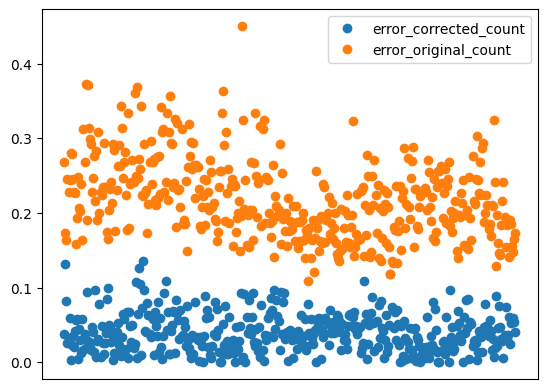

In [28]:
fig, ax = plt.subplots()
ax.plot(df2[['error_corrected_count','error_original_count']], marker = 'o',linestyle=' ')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

ax.legend(['error_corrected_count','error_original_count'])

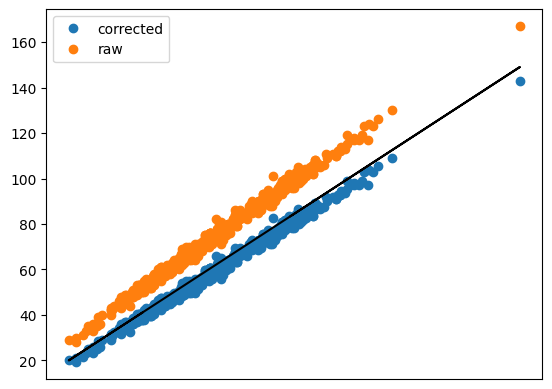

In [40]:
fig, ax = plt.subplots()
ax.plot(df2['manual'], df2['corrected'],df2['manual'], df2['raw'], marker = 'o',linestyle=' ')
ax.plot(df2['manual'], df2['manual'], color = 'k')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

ax.legend(['corrected','raw'])